#Boston housing Price prediction

In [4]:
import numpy as np
import pandas as pd
import sklearn

In [5]:
print(np.__version__)
print(pd.__version__)

import sys
print(sys.version)
print(sklearn.__version__)

1.26.4
2.2.1
3.9.19 (main, Mar 21 2024, 17:11:28) 
[GCC 11.2.0]
1.4.1.post1


In [6]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


df means dataframe

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.13.2


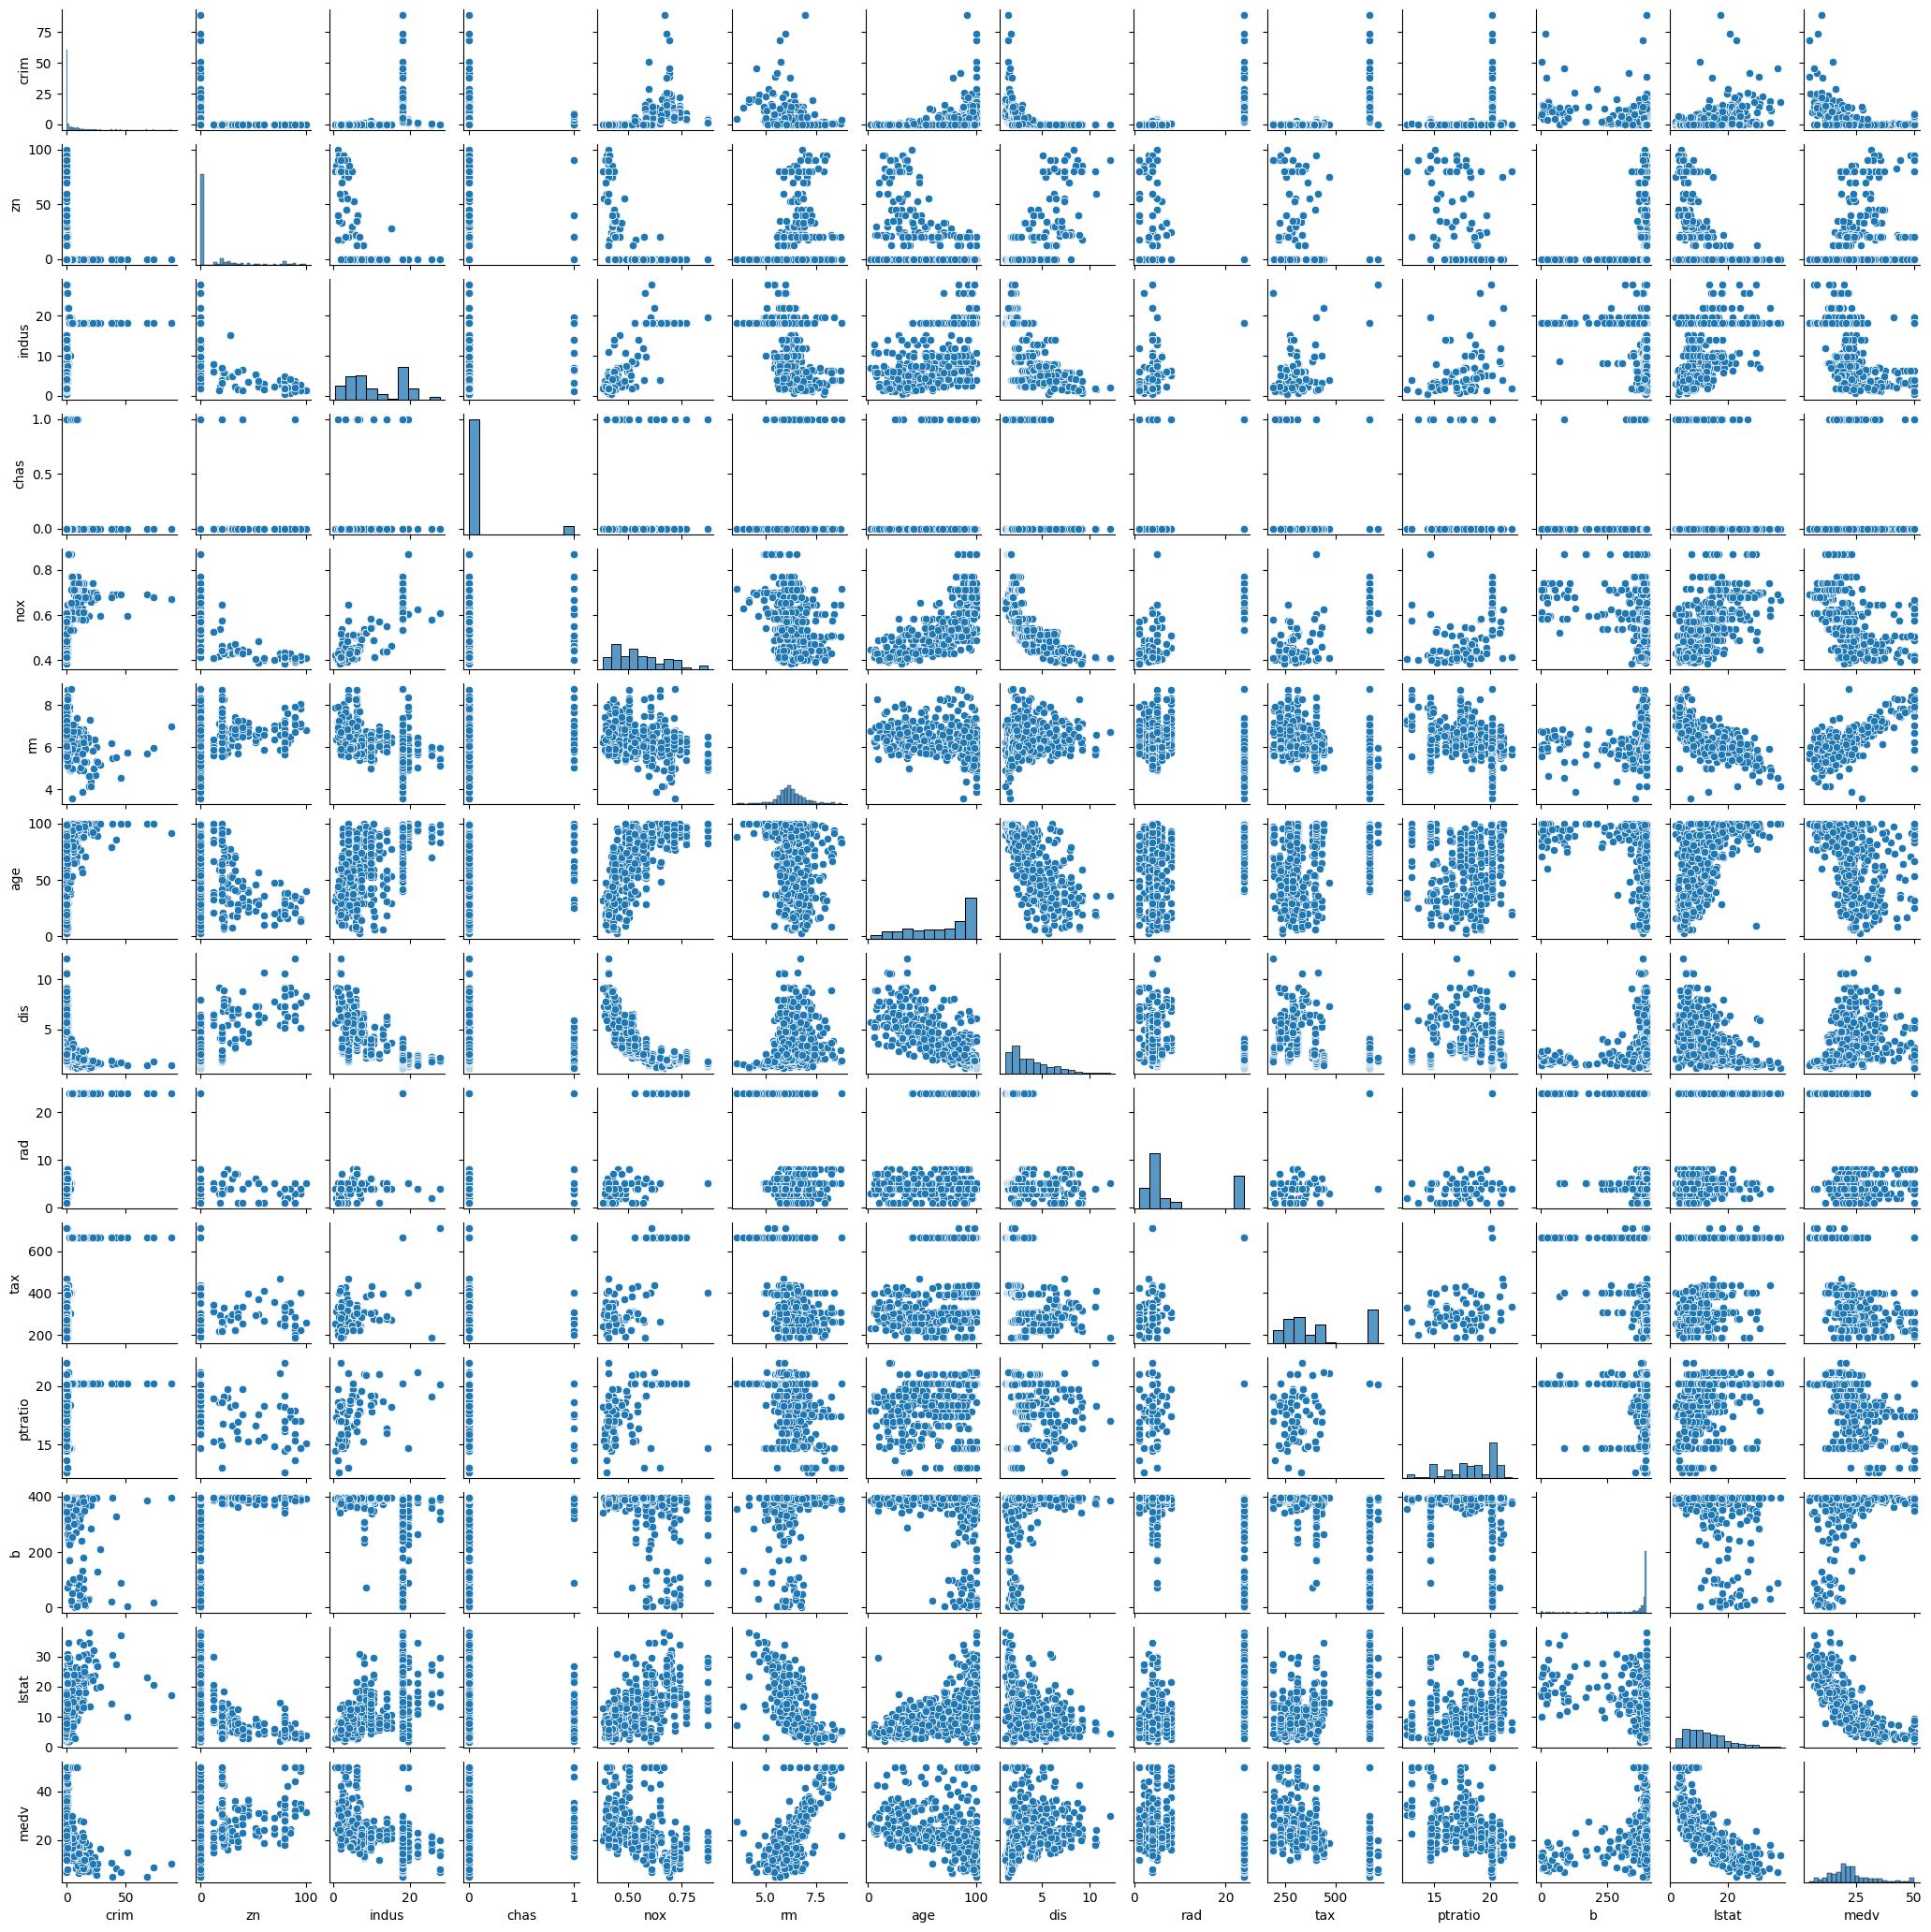

In [8]:
sns.pairplot(df, height=1.5)
plt.show()


In [9]:
col_study = ['crim','zn','indus','nox','rm']

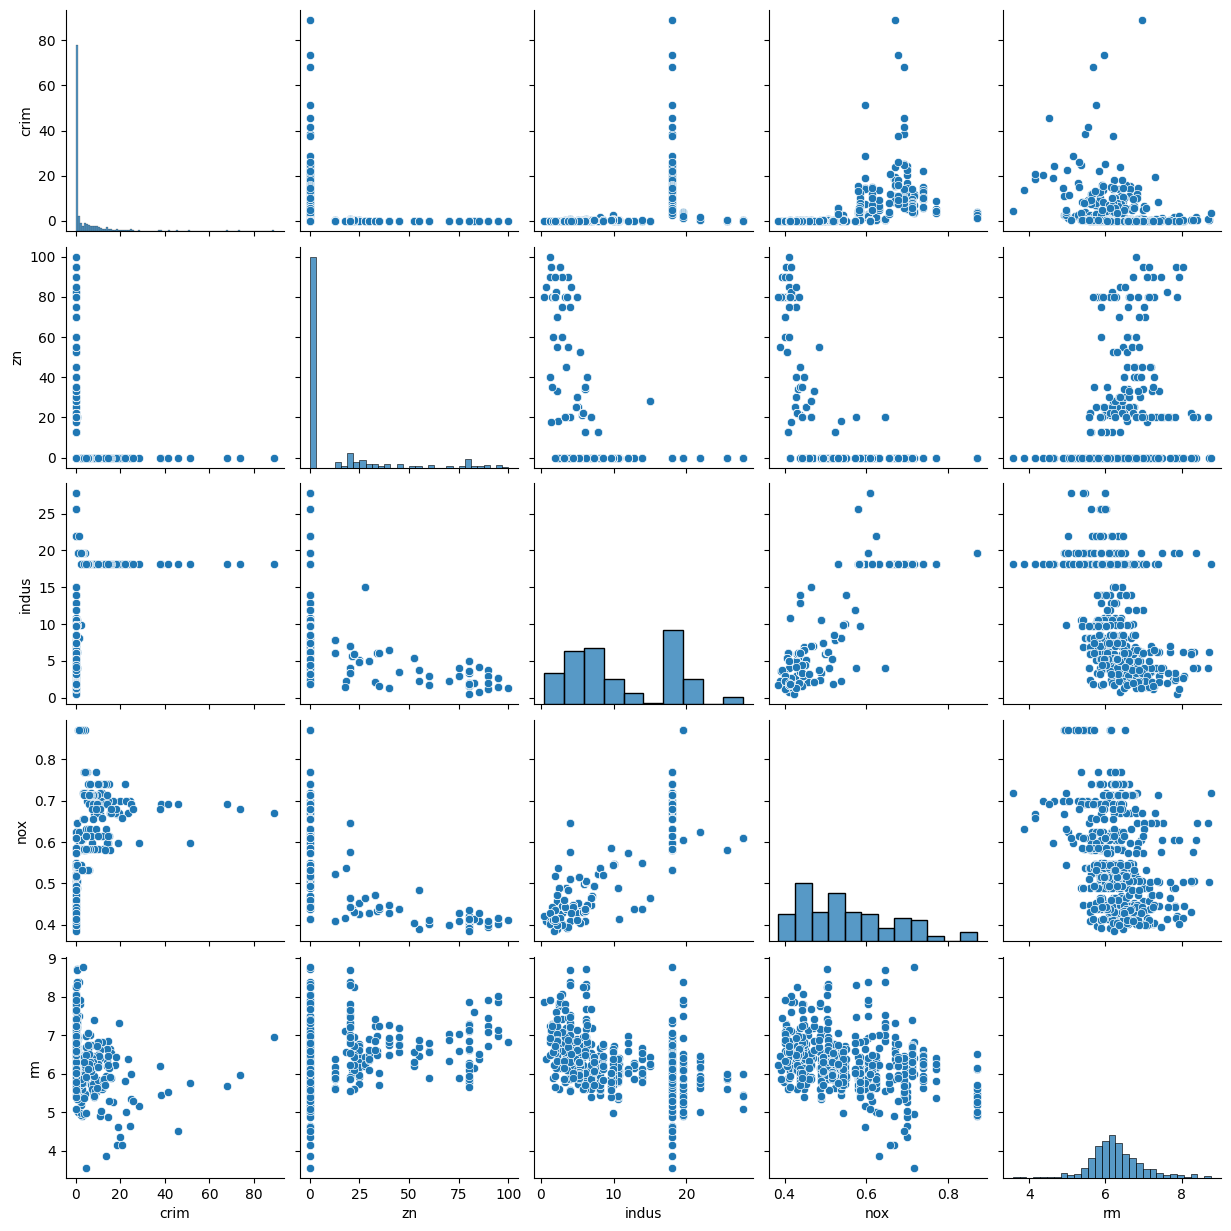

In [10]:
sns.pairplot(df[col_study], height=2.5)
plt.show()

In [11]:
col_study = ['ptratio','b','lstat','medv']

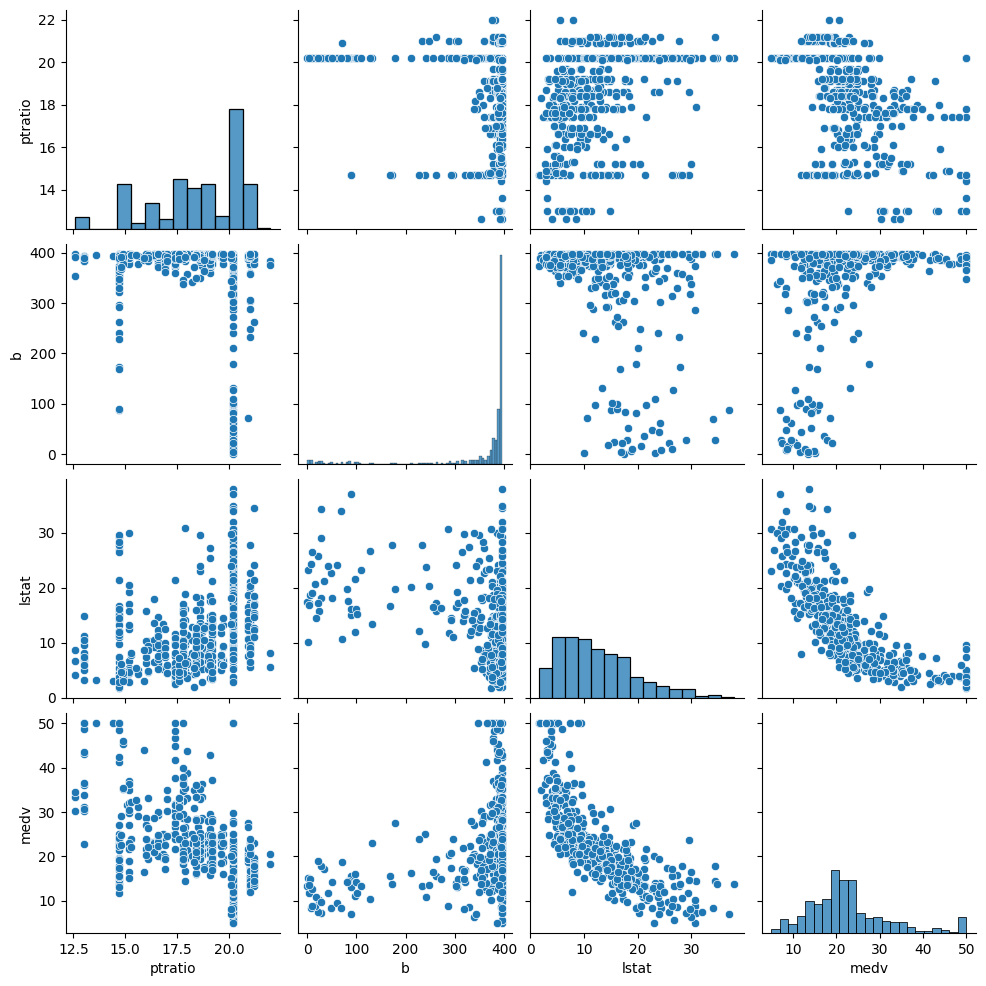

In [12]:
sns.pairplot(df[col_study], height=2.5)
plt.show()

Correlation Analysis and Feature Selection
      to understand the keyfeatures which have high relation with results

In [13]:
pd.options.display.float_format = '{:,.2f}'.format

In [14]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


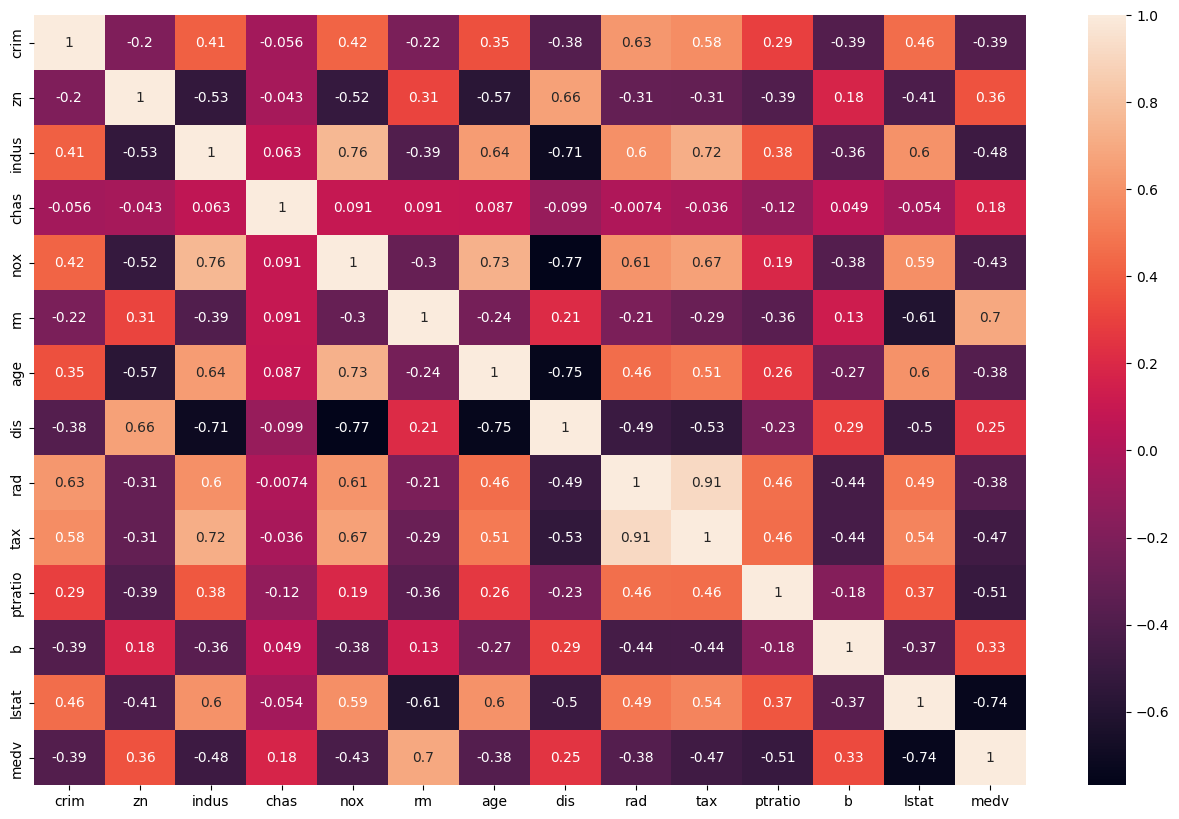

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

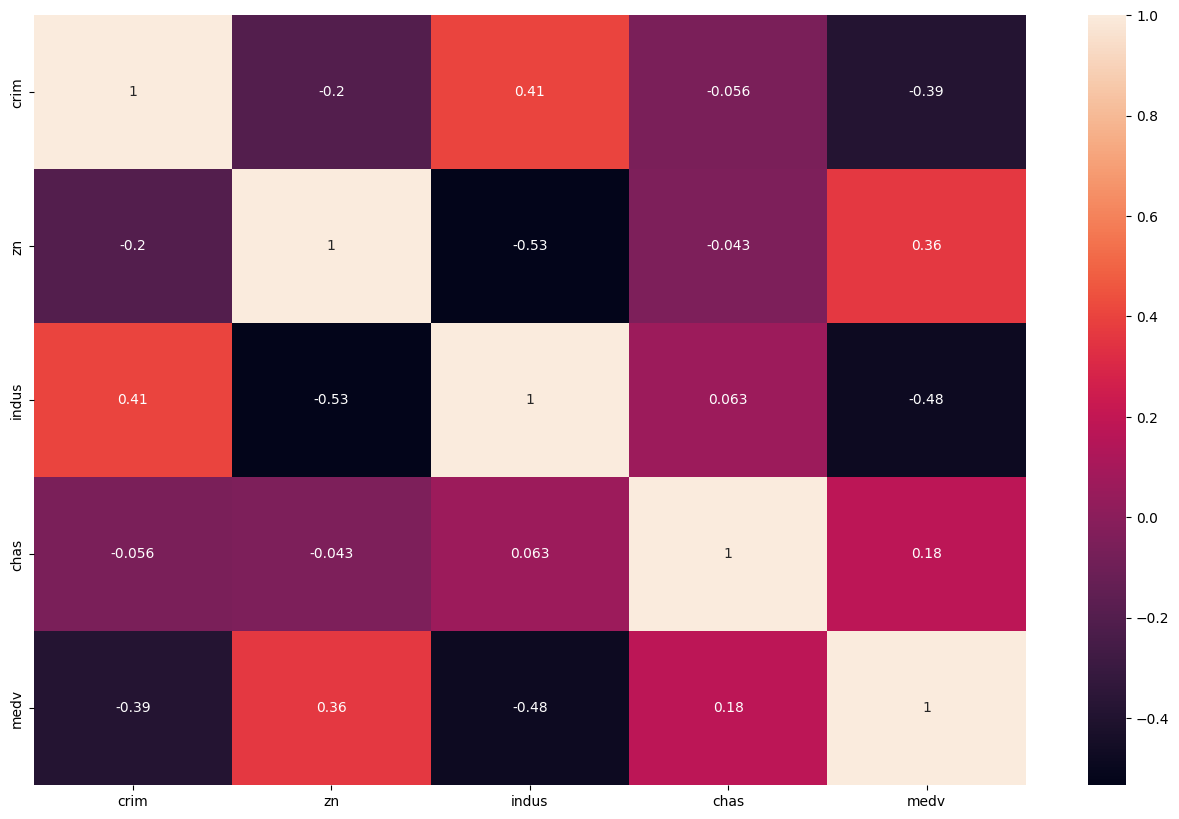

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(df[['crim','zn','indus','chas','medv']].corr(), annot= True)
plt.show()

extra

In [18]:
import matplotlib as mlt
print(mlt.__version__)

3.8.4


Linear Regression with Scikit-Learn

In [19]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20


In [20]:
X = df['rm'].values.reshape(-1,1)

In [21]:
y = df['medv'].values

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X,y)


LinearRegression()

In [25]:
model.coef_

array([9.10210898])

In [26]:
model.intercept_

-34.67062077643857

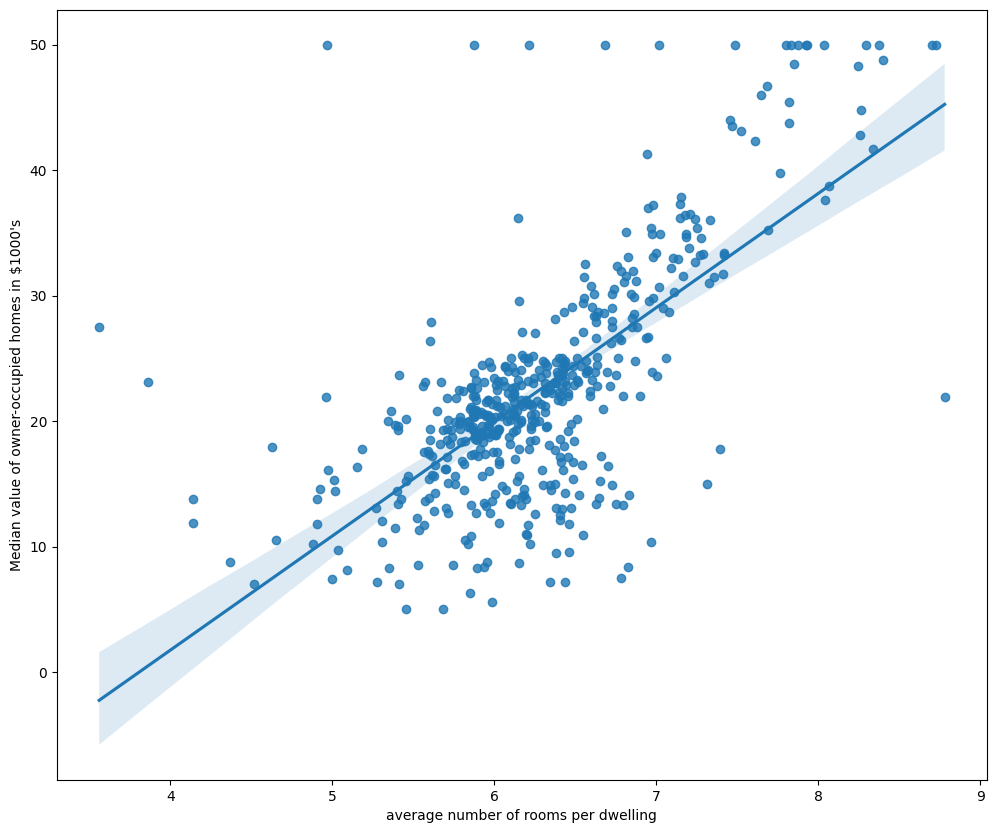

In [27]:
plt.figure(figsize=(12,10))
sns.regplot(x=X,y=y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

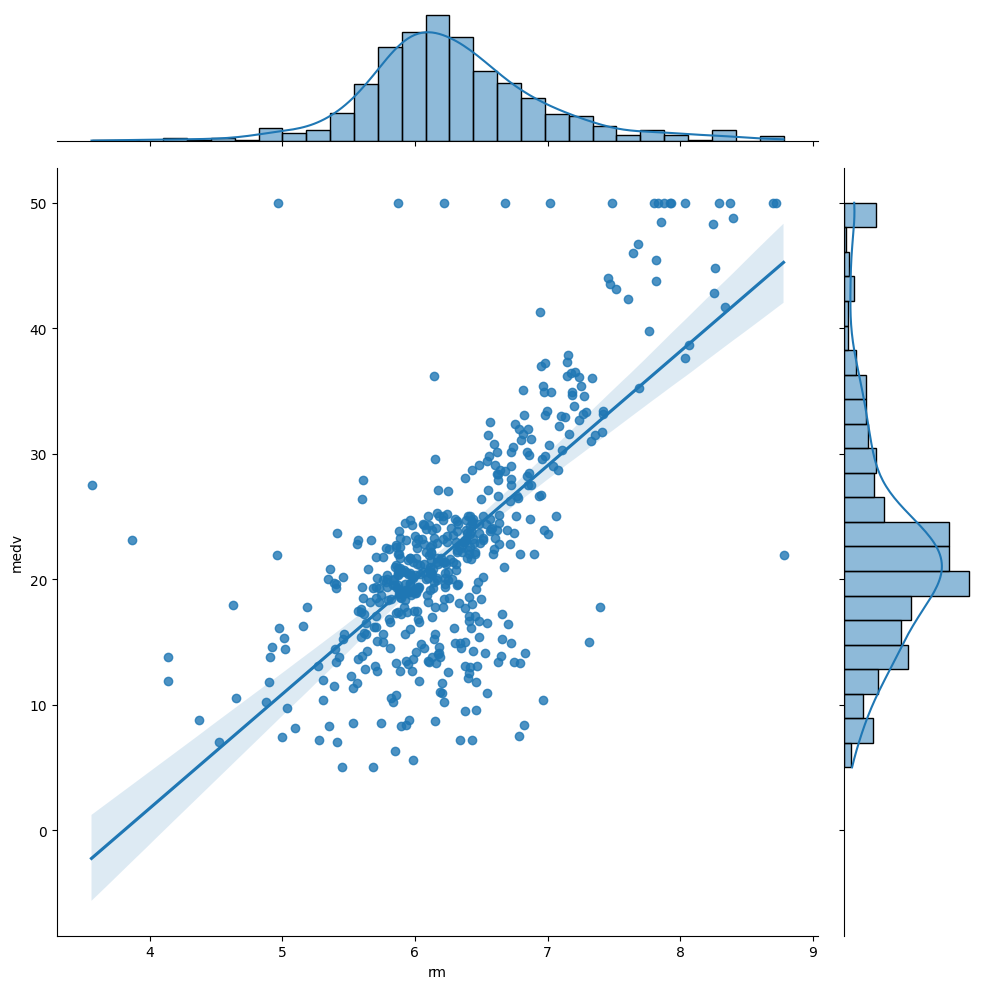

In [28]:
sns.jointplot(x='rm',y='medv',data=df, kind='reg', height=10)
plt.show();

In [29]:
model.predict(np.array([7]).reshape(1,-1))

array([29.04414209])

5 steps mechine learning process

In [30]:
#step1: selecting a model
       #already selected in previous code
         ##from sklearn.linear_model import LinearRegression 
       
#step2: choose model hyperparameters by instanciating this class with desired values or creating an instance of model
ml_2 = LinearRegression()

#step3: arrange data into features matrix and target vector
X = df['lstat'].values.reshape(-1,1)
y = df['medv'].values

# Step4: Fit the model to your data by calling the fit() method of the model instance
ml_2.fit(X,y)
#step5: apply the model to new data
ml_2.predict(np.array([15]).reshape(1,-1))



array([20.30310057])

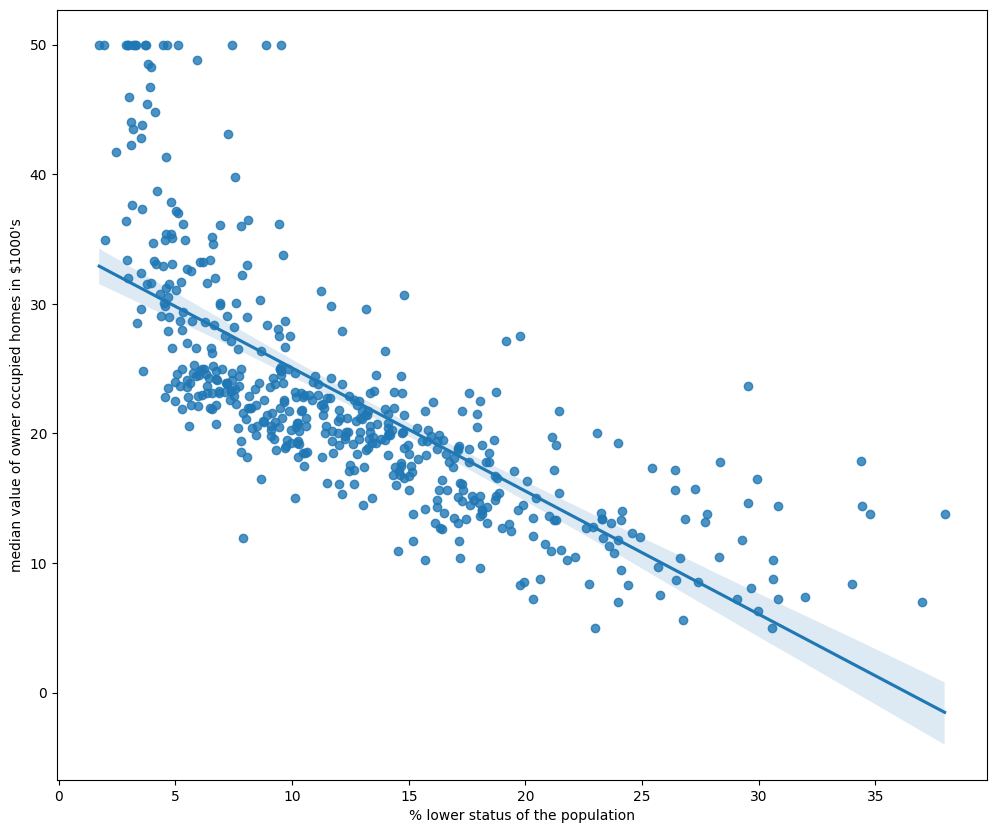

In [31]:
plt.figure(figsize=(12,10))
sns.regplot(x=X,y=y)
plt.xlabel('% lower status of the population')
plt.ylabel("median value of owner occupied homes in $1000's")
plt.show()

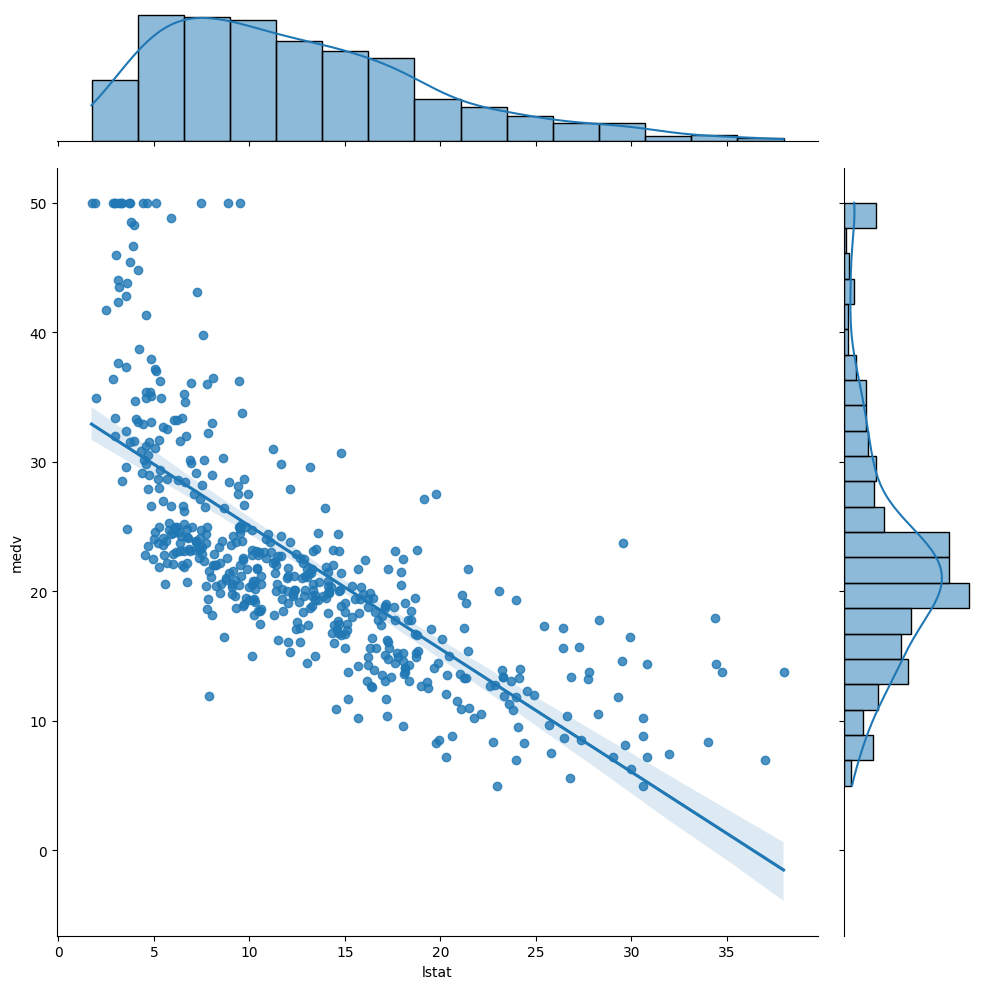

In [32]:
sns.jointplot(x='lstat', y='medv', data=df, kind='reg', height=10)
plt.show()

Robust Regression

In [33]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20


RANdom SAmple Consensus (RANSAC) Algorithm

In [34]:
from sklearn.linear_model import RANSACRegressor

In [35]:
ransac = RANSACRegressor()


In [36]:
X = df['rm'].values.reshape(-1,1)
y = df['medv'].values

In [37]:
ransac.fit(X,y)


RANSACRegressor()

In [38]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [41]:
np.arange(3,10,1)

array([3, 4, 5, 6, 7, 8, 9])

In [42]:
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X.reshape(-1,1)) 

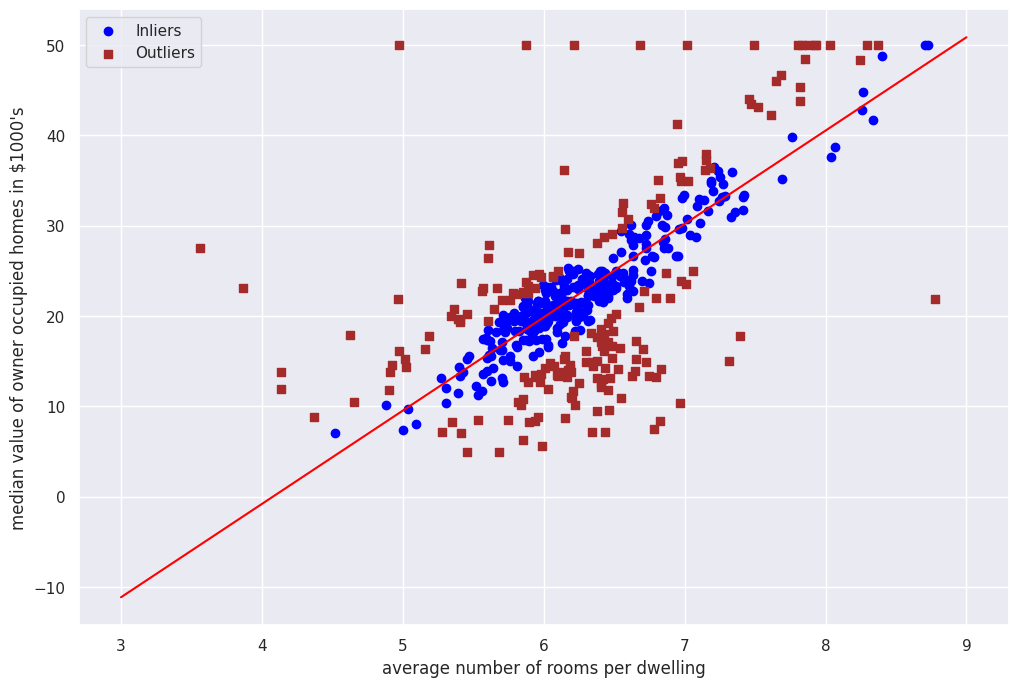

In [43]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8))
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker = 'o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("median value of owner occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [44]:
ransac.estimator_.coef_

array([10.33253838])

In [45]:
ransac.estimator_.intercept_

-42.12597736586093

In [47]:
X = df['lstat'].values.reshape(-1,1)
y = df['medv'].values
ransac.fit(X,y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0,40,1)
line_y_ransac = ransac.predict(line_X.reshape(-1,1))

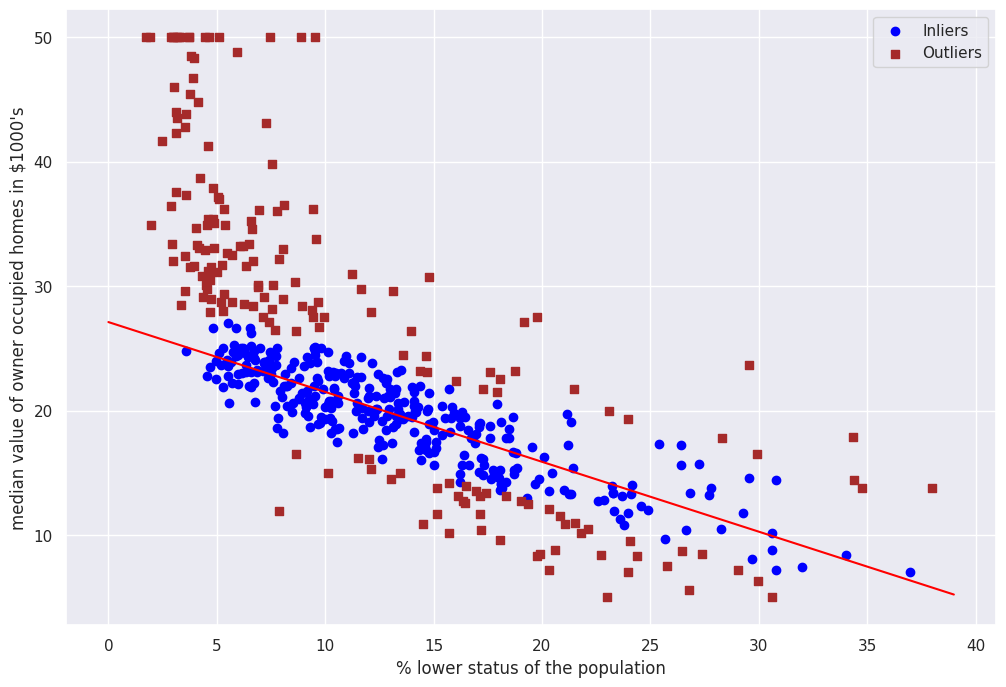

In [50]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8))
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker = 'o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("median value of owner occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

Performance eveluation of regression model

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df.iloc[:,:-1].values

In [53]:
y = df['medv'].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(X_train, y_train)


LinearRegression()

In [57]:
y_train_pred = lr.predict(X_train)


In [58]:
y_test_pred = lr.predict(X_test)

method 1: Residual analysis

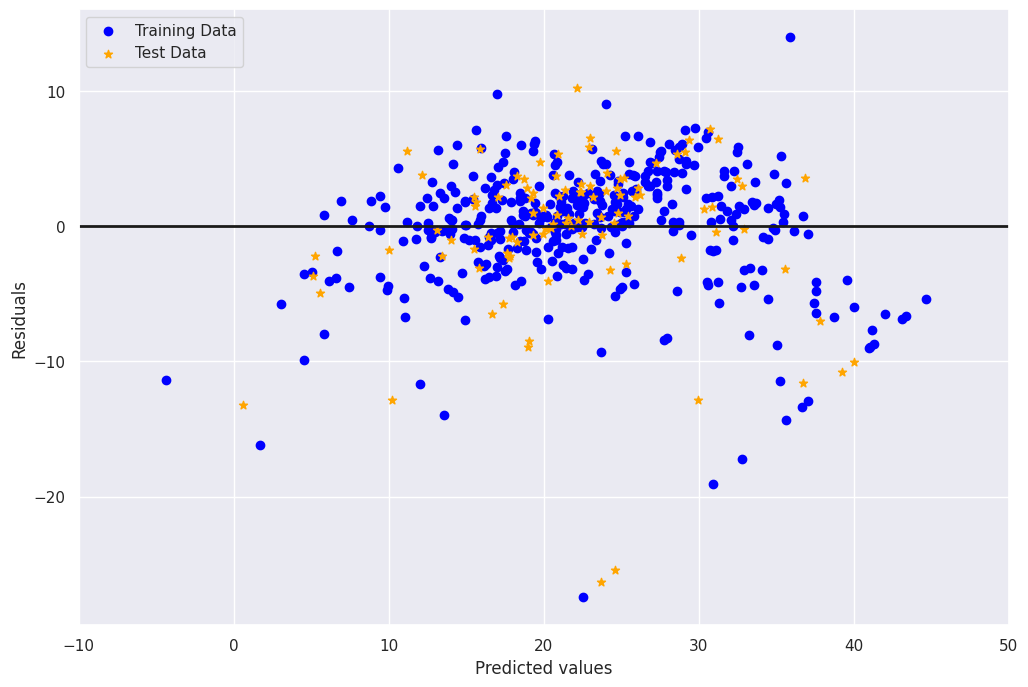

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label = 'Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker = '*', label= 'Test Data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10,xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

method2 : mean squared Error(MSE)

lower the number is better
actually averaging the error
MSE= (1/n)sigma(i=1 to n)(y(i)-y^(i))^2

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mean_squared_error(y_train, y_train_pred)

19.32647020358573

In [62]:
mean_squared_error(y_test, y_test_pred)

33.44897999767653

Coefficient of Determination, R^2

higher the value is better
 R^2 = 1-(SSE/SST) 

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_train,y_train_pred)

0.7730135569264233

In [65]:
r2_score(y_test, y_test_pred)

0.5892223849182507